# Model

## Importing Data

In [52]:
# Import necessary modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

# Display 100 columns max
pd.set_option('display.max_columns', 100)

# Display 20 characters max within a cell
# pd.set_option('max_colwidth',60)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import mlflow

import pickle

In [90]:
# Import imputed data
df = pd.read_pickle("autos_golden_20190719.pkl")

# Import data without missing values (No imputation, no missing in the data)
df_clean = pd.read_pickle("autos_clean_golden_20190719.pkl")

# Import data with missing values (No imputation)
df_missing = pd.read_pickle("autos_missing_golden_20190719.pkl")

In [3]:
df.shape, df_missing.shape

((15911, 150), (15915, 150))

In [4]:
df_clean.shape

(9975, 150)

In [5]:
df.head()

,co2_emission,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,inspection_new,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,...,ext_tuned_car,ext_voice_control,ext_winter_tyres,make_Audi,make_Opel,make_Renault,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Duster,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used,price
0,99.0,1422.0,66.0,56013.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,5.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15770.0
1,129.0,1798.0,141.0,80000.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,4.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,14500.0
2,99.0,1598.0,85.0,83450.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14640.0
3,99.0,1422.0,66.0,73000.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,4.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14500.0
4,109.0,1422.0,66.0,16200.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,3.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,5.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16790.0


## Model

In [91]:
# Create features and target (df)
X = df.drop('price', axis = 1) # features
y = df['price'] # target

In [7]:
# Create features and target (df)
X_c = df_clean.drop('price', axis = 1) # features
y_c = df_clean['price'] # target

In [8]:
# # Create features and target (array)
# X = df.drop('price', axis = 1).values # features
# y = df['price'].values # target

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=57)

In [10]:
# Train-test split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size = 0.3, random_state=57)

### Model Evaluation Metrics

In [12]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2

### Linear Regression

In [92]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(interaction_only=True,include_bias = False)
poly.fit_transform(X)

array([[  99., 1422.,   66., ...,    0.,    0.,    0.],
       [ 129., 1798.,  141., ...,    0.,    0.,    0.],
       [  99., 1598.,   85., ...,    0.,    0.,    0.],
       ...,
       [ 139., 1997.,  146., ...,    0.,    0.,    0.],
       [ 139., 1997.,  147., ...,    0.,    0.,    0.],
       [ 153., 1798.,  165., ...,    0.,    0.,    0.]])

In [93]:
X.columns

Index(['co2_emission', 'displacement', 'hp', 'km', 'ss_abs',
       'ss_adaptive_cruise_control', 'ss_adaptive_headlights',
       'ss_alarm_system', 'ss_blind_spot_monitor', 'ss_central_door_lock',
       ...
       'gearing_type_Semi-automatic', 'fuel_diesel', 'fuel_electric',
       'fuel_gasoline', 'fuel_lpg', 'type_Demonstration',
       'type_Employee's car', 'type_New', 'type_Pre-registered', 'type_Used'],
      dtype='object', length=149)

### Lasso

In [12]:
# Create Alphas, and lists to store scores
alpha_space = np.linspace(1, 10)
lasso_scores = []

# Create a regressor
lasso_ = Lasso(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:
    
    # Specify alpha
    lasso_.alpha = alpha
    
    # Perfrom 5-fold CV
    lasso_cv_scores = cross_val_score(lasso_, X_train, y_train, cv=5)
    
    # Append the mean and std to the lists
    lasso_scores.append(np.mean(lasso_cv_scores))
    
    # Log parameter, metrics, and model to MLflow
    with mlflow.start_run(run_name="Lasso CV"): # "with" is necessary for multiple runs
        mlflow.log_param("alpha", alpha)
        mlflow.log_metric("lasso_cv_score", np.mean(lasso_cv_scores))

In [13]:
#!mlflow ui

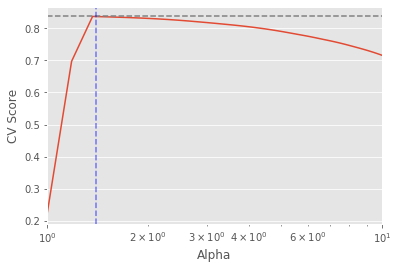

In [14]:
# Create a function to display how cv scores changes with alphas
def display_plot(cv_scores):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    ax.set_ylabel('CV Score')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    ax.axvline(x=1.4, c='b', linestyle='--', alpha=0.5)
    plt.show()
    
display_plot(lasso_scores)

$alpha = 1.4$ seems to be a good choice

In [15]:
# Instantiate Lasso regressor
lasso = Lasso(alpha = 1.4, normalize = True)

# Fit the regressor
lasso.fit(X_train, y_train)

# Print the R-squared
print("R^2: {0:.3f}".format(lasso.score(X_test, y_test)))

# Calculate evaluation metrics
rmse, mae, r2 = eval_metrics(y_test, lasso.predict(X_test))

# Log parameter, metrics, and model to MLflow
with mlflow.start_run(run_name="Lasso Regression"):
    mlflow.log_param("alpha", 1.4)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("r2", r2)
#mlflow.end_run()

R^2: 0.850


In [16]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(lasso, X_test, y_test, cv=5)

print("Average 5-Fold CV Score: {0:.3f}".format(np.mean(cv_scores)))

Average 5-Fold CV Score: 0.856


### Linear Regression

In [17]:
# Create the regressor
reg = LinearRegression()

# Fit the regressor to the training data
reg.fit(X_train, y_train)

# Print the R-squared
print("R^2: {0:.2f}".format(reg.score(X_test, y_test)))

# Calculate evaluation metrics
rmse, mae, r2 = eval_metrics(y_test, reg.predict(X_test))

# Log parameter, metrics, and model to MLflow
mlflow.start_run(run_name="Linear Regression")
mlflow.log_param("normalize", False)
mlflow.log_metric("rmse", rmse)
mlflow.log_metric("mae", mae)
mlflow.log_metric("r2", r2)
mlflow.end_run()

R^2: 0.86


In [18]:
# Create the regressor
reg = LinearRegression(normalize=True)

# Fit the regressor to the training data
reg.fit(X_train, y_train)

# Print the R-squared
print("R^2: {0:.2f}".format(reg.score(X_test, y_test)))

# Calculate evaluation metrics
rmse, mae, r2 = eval_metrics(y_test, reg.predict(X_test))

# Log parameter, metrics, and model to MLflow
mlflow.start_run(run_name="Linear Regression")
mlflow.log_param("normalize", True)
mlflow.log_metric("rmse", rmse)
mlflow.log_metric("mae", mae)
mlflow.log_metric("r2", r2)
mlflow.end_run()

R^2: 0.86


In [19]:
# Create the regressor
reg = LinearRegression()

# Fit the regressor to the training data
reg.fit(X_train_c, y_train_c)

# Print the R-squared
print("R^2: {0:.2f}".format(reg.score(X_test_c, y_test_c)))

# Calculate evaluation metrics
rmse, mae, r2 = eval_metrics(y_test, reg.predict(X_test))

# Log parameter, metrics, and model to MLflow
with mlflow.start_run(run_name="Linear Regression 'Dropped Missing'"):
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("r2", r2)

R^2: 0.89


### Random Forest

In [21]:
preds_rf = reg_rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds_rf))
print("RMSE: %f" % (rmse))

RMSE: 2263.214033


In [22]:
reg_rf = RandomForestRegressor(random_state=57, n_estimators=100)

reg_rf.fit(X_train_c, y_train_c)

reg_rf.score(X_test_c, y_test_c)

#pd.DataFrame({'x':X_hp.columns.values, 'y':reg_rf.feature_importances_})

# Calculate evaluation metrics
rmse, mae, r2 = eval_metrics(y_test_c, reg_rf.predict(X_test_c))

# Log parameter, metrics, and model to MLflow
with mlflow.start_run(run_name="Random Forest 'Dropped Missing'"):
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("r2", r2)

In [23]:
preds_rf = reg_rf.predict(X_test_c)

rmse = np.sqrt(mean_squared_error(y_test_c, preds_rf))
print("RMSE: %f" % (rmse))
print("R2: ", r2)

RMSE: 1417.694077
R2:  0.9564041028161769


In [24]:
feature_importance = pd.DataFrame({'features':X_c.columns.values, 'importance':reg_rf.feature_importances_}).sort_values('importance', ascending=False)
feature_importance.head(10).set_index('features')

,importance
features,
hp,0.452566
age,0.189630
km,0.072461
make_Audi,0.057877
model_Espace,0.046592
gearing_type_Manual,0.021433
model_Astra,0.017461
model_A3,0.013834
displacement,0.012800


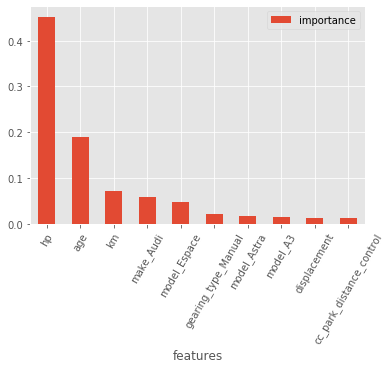

In [27]:
feature_importance.set_index('features')[:10].plot.bar(rot=60)

### XGBoost with Imputed Missing Values

In [28]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

xg_reg.fit(X_train, y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

# Calculate evaluation metrics
rmse, mae, r2 = eval_metrics(y_test, xg_reg.predict(X_test))

# Log parameter, metrics, and model to MLflow
mlflow.start_run(run_name="XGBoost Imputed")
mlflow.log_param("alpha", 10)
mlflow.log_param("max_depth", 5)
mlflow.log_metric("rmse", rmse)
mlflow.log_metric("mae", mae)
mlflow.log_metric("r2", r2)
mlflow.end_run()

/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RMSE: 2166.499875


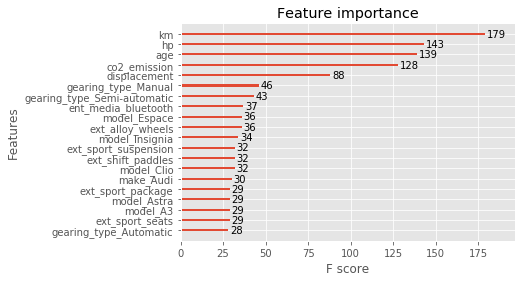

In [29]:
xgb.plot_importance(xg_reg, max_num_features=20)

### XGBoost with Dropped Missing Values

In [30]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

xg_reg.fit(X_train_c, y_train_c)

preds = xg_reg.predict(X_test_c)

rmse = np.sqrt(mean_squared_error(y_test_c, preds))
print("RMSE: %f" % (rmse))

# Calculate evaluation metrics
rmse, mae, r2 = eval_metrics(y_test_c, xg_reg.predict(X_test_c))

# Log parameter, metrics, and model to MLflow
mlflow.start_run(run_name="XGBoost - 'Dropped Missing'")
mlflow.log_param("alpha", 10)
mlflow.log_param("max_depth", 5)
mlflow.log_metric("rmse", rmse)
mlflow.log_metric("mae", mae)
mlflow.log_metric("r2", r2)
mlflow.end_run()

/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RMSE: 1482.357043


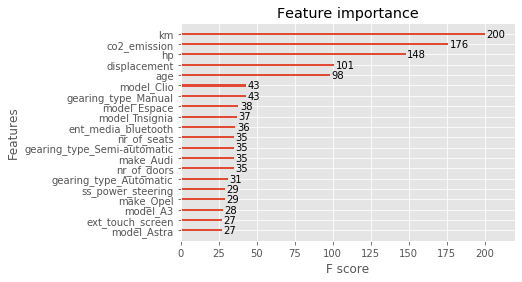

In [31]:
xgb.plot_importance(xg_reg, max_num_features=20)

### XGBoost with Missing Values

In [32]:
# Create features and target (df)
X_m = df_missing.drop('price', axis = 1) # features
y_m = df_missing['price'] # target

# Train-test split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, test_size = 0.3, random_state=57)

In [33]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

xg_reg.fit(X_train_m, y_train_m)

preds = xg_reg.predict(X_test_m)

rmse = np.sqrt(mean_squared_error(y_test_m, preds))
print("RMSE: %f" % (rmse))

# Calculate evaluation metrics
rmse, mae, r2 = eval_metrics(y_test_m, xg_reg.predict(X_test_m))

# Log parameter, metrics, and model to MLflow
mlflow.start_run(run_name="XGBoost NOT Imputed")
mlflow.log_param("alpha", 10)
mlflow.log_param("max_depth", 5)
mlflow.log_metric("rmse", rmse)
mlflow.log_metric("mae", mae)
mlflow.log_metric("r2", r2)
mlflow.end_run()

/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RMSE: 1689.542295


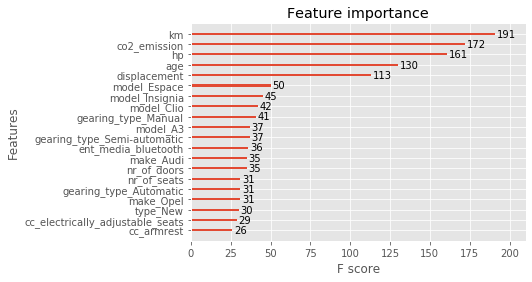

In [34]:
xgb.plot_importance(xg_reg, max_num_features=20)

## Save Model (4 features)

In [53]:
# Import imputed data
df_no_dummy = pd.read_pickle("autos_clean_no_dummy_20190805.pkl")

In [5]:
test_data = df_no_dummy[['hp', 'age', 'km', 'model', 'price']].copy()

In [62]:
# Create features and target (df)
X = pd.get_dummies(df_no_dummy[['hp', 'age', 'km', 'model']]) # features
y = df_no_dummy['price'] # target

In [7]:
X.head()

,hp,age,km,model_A1,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia
0,66.0,3.0,56013.0,1,0,0,0,0,0,0
1,141.0,2.0,80000.0,1,0,0,0,0,0,0
2,85.0,3.0,83450.0,1,0,0,0,0,0,0
3,66.0,3.0,73000.0,1,0,0,0,0,0,0
4,66.0,3.0,16200.0,1,0,0,0,0,0,0


In [8]:
y.head()

0    15770
1    14500
2    14640
3    14500
4    16790
Name: price, dtype: int64

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=57)

In [13]:
reg_rf = RandomForestRegressor(n_estimators=100, random_state=57)

reg_rf.fit(X_train, y_train)

# Calculate evaluation metrics
rmse, mae, r2 = eval_metrics(y_test, reg_rf.predict(X_test))

print("rmse: {}, mae: {}, r2: {}".format(rmse, mae, r2))

rmse: 2163.200001797414, mae: 1414.3157327062113, r2: 0.8984981590718838


In [14]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [15]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [16]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [17]:
rf_best = rf_random.best_estimator_

In [18]:
# reg_rf = RandomForestRegressor(n_estimators=100, random_state=57)

# reg_rf.fit(X_train, y_train)

# Calculate evaluation metrics
rmse, mae, r2 = eval_metrics(y_test, rf_best.predict(X_test))

print("rmse: {}, mae: {}, r2: {}".format(rmse, mae, r2))

rmse: 2040.853976857774, mae: 1364.244346204728, r2: 0.9096549351578558


In [56]:
# Save RandomForest model
# pickle.dump(rf_best, open('model_rf.pkl','wb'))

In [57]:
list(X.columns)

['hp',
 'age',
 'km',
 'model_A1',
 'model_A3',
 'model_Astra',
 'model_Clio',
 'model_Corsa',
 'model_Espace',
 'model_Insignia']

In [58]:
# Save column names to persist the features in deployment phase
# pickle.dump(list(X.columns), open('model_features.pkl','wb'))

In [70]:
test_data['prediction'] = rf_best.predict(X)

In [20]:
test_data.sample(5)

,hp,age,km,model,price,prediction
7281,77.0,1.0,991.0,Astra,15449,15517.079943
4933,85.0,1.0,7717.0,A3,20890,22039.546147
6779,81.0,2.0,30322.0,Astra,12990,12781.086191
13070,87.0,1.0,11100.0,Clio,13950,16126.151766
7410,66.0,0.0,10.0,Astra,14990,16673.188099


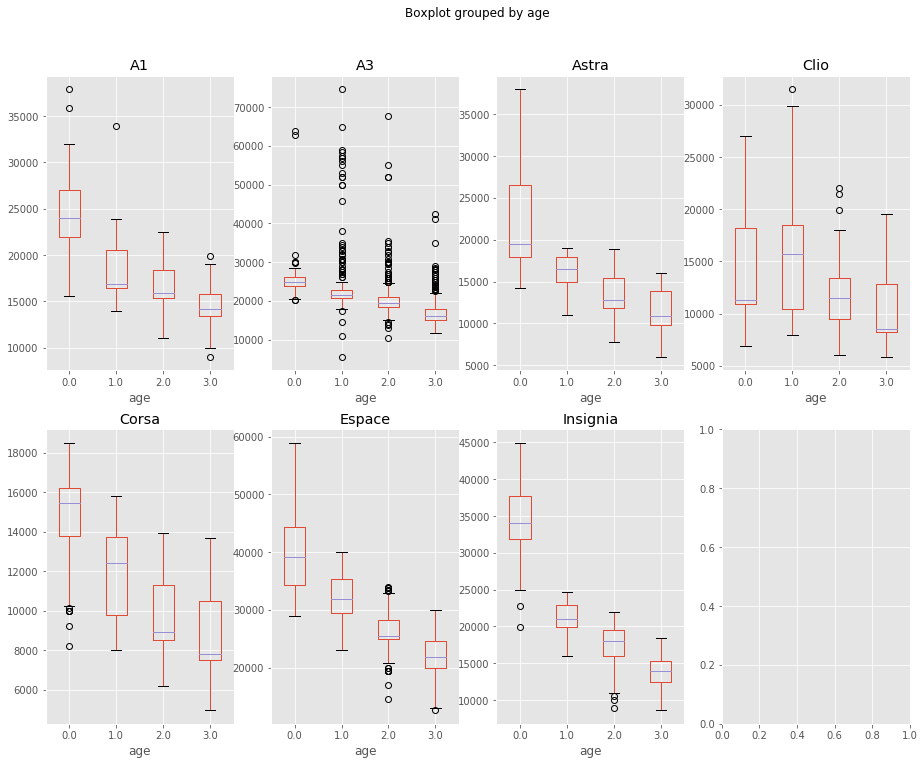

In [49]:
# Create subplots
fig, ax = plt.subplots(2, 4, figsize=(15, 12))

# Plot subplots
i = 0
j = 0

for model in ['A1', 'A3', 'Astra', 'Clio', 'Corsa', 'Espace', 'Insignia']:
    
    df_no_dummy[df_no_dummy.model == model].boxplot('price', by='age', ax = ax[j, i])
    ax[j, i].set_title(model)
    # Next subplot
    i += 1
    
    if i == 4:
        i = 0
        j = 1


In [54]:
df_no_dummy.model.value_counts()

A3          2287
A1          1784
Insignia    1660
Astra       1567
Corsa       1194
Clio         870
Espace       613
Name: model, dtype: int64

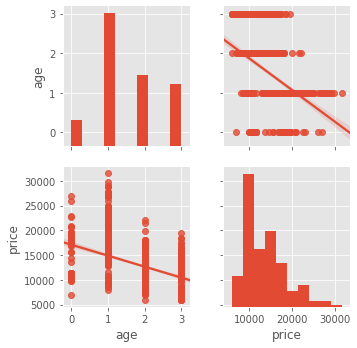

In [61]:
sns.pairplot(df_no_dummy[df_no_dummy.model=='Clio'][['age', 'price']], kind='reg')

In [63]:
rf_best.decision_path(X)

(<9975x144744 sparse matrix of type '<class 'numpy.int64'>'
 	with 13590462 stored elements in Compressed Sparse Row format>,
 array([     0,   1513,   3086,   4615,   6044,   7469,   8850,  10343,
         11748,  13275,  14846,  16369,  17808,  19191,  20716,  22123,
         23592,  25111,  26638,  28103,  29566,  31025,  32516,  33987,
         35384,  36853,  38352,  39835,  41284,  42765,  44222,  45639,
         46956,  48447,  49868,  51219,  52662,  54123,  55632,  57089,
         58530,  59949,  61488,  62855,  64338,  65791,  67330,  68765,
         70164,  71533,  72988,  74315,  75800,  77267,  78646,  80155,
         81618,  82971,  84444,  85769,  87276,  88751,  90224,  91487,
         92902,  94311,  95746,  97119,  98590,  99843, 101242, 102541,
        103974, 105531, 106960, 108435, 109916, 111333, 112824, 114357,
        115784, 117199, 118628, 120177, 121650, 123153, 124498, 125949,
        127412, 128929, 130312, 131803, 133162, 134495, 135920, 137403,
        13

In [71]:
rf_best

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [74]:
rf_best.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [84]:
import graphviz
import pydot


tree = rf_best.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = X_train.columns, 
rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [98]:
from statsmodels.graphics.factorplots import interaction_plot

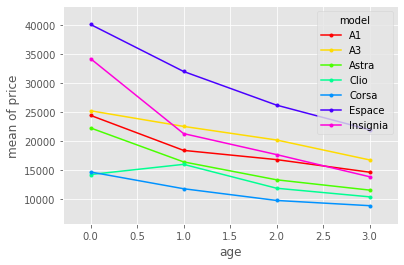

In [105]:
fig = interaction_plot(df_no_dummy.age, df_no_dummy.model, df_no_dummy.price)
plt.show()